# Notebook to test JEC quadratures

In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import sys
import os
os.getcwd()

'/sps/lsstcest/users/campagne/jax_cosmo_forked'

In [16]:
os.chdir("../../")
os.getcwd()

'/sps/lsstcest/users'

In [17]:
%pylab inline
import os
os.environ['JAX_ENABLE_X64']='True'
import jax
from jax_cosmo import Cosmology, background

Populating the interactive namespace from numpy and matplotlib


In [18]:
# We first define jax_cosmo cosmologies

cosmo_jax = Cosmology(Omega_c=0.3, Omega_b=0.05, h=0.7, sigma8 = 0.8, n_s=0.96,
                      Omega_k=0., w0=-1., wa=0.)

## Comparing angular cl

In [19]:
from jax_cosmo.redshift import smail_nz

# Let's define a redshift distribution
# with a Smail distribution with a=1, b=2, z0=1
nz = smail_nz(1.,2., 1.)

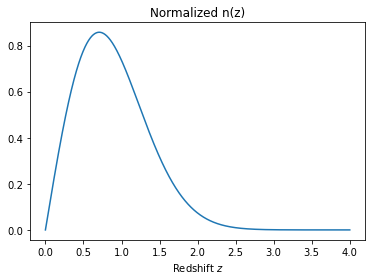

In [20]:
z = linspace(0,4,1024)
plot(z, nz(z))
xlabel(r'Redshift $z$');
title('Normalized n(z)');

In [21]:
from jax_cosmo.angular_cl import angular_cl
from jax_cosmo import probes

In [22]:
# Let's first compute some Weak Lensing cls
tracer_jax = probes.WeakLensing([nz])
ell = np.logspace(0.1,3)

In [39]:
from jax import jit

In [23]:
from jax_cosmo.scipy.integrate import TrapezoidalQuad,ClenshawCurtisQuad

In [146]:
from jax_cosmo.angular_cl import angular_cl

In [147]:
# use default simpson integration
jec_cl_jax1= angular_cl(cosmo_jax, ell, [tracer_jax])

In [111]:
# use user Clenshaw-Curtis quadrature integration
jec_cl_jax2= angular_cl(cosmo_jax, ell, [tracer_jax], quadInt=ClenshawCurtisQuad(50))

(JEC) sigmasqr: y_old, y 6.704689624683349e-06 6.698968263937865e-06 -5.7213607454840575e-09
(JEC) sigmasqr: y_old, y 6.704689624683349e-06 6.698968263937865e-06 -5.7213607454840575e-09
(JEC) sigmasqr: y_old, y 6.704689624683349e-06 6.698968263937865e-06 -5.7213607454840575e-09


In [150]:
jec_cl_jax5= angular_cl(cosmo_jax, ell, [tracer_jax], quadInt=ClenshawCurtisQuad(5))

In [151]:
jec_cl_jax6= angular_cl(cosmo_jax, ell, [tracer_jax], quadInt=ClenshawCurtisQuad(3))

In [114]:
# use user Trapezoidale quadrature integration

In [149]:
jec_cl_jax7= angular_cl(cosmo_jax, ell, [tracer_jax], quadInt=TrapezoidalQuad(5))

Text(0, 0.5, 'Lensing angular $C_\\ell$')

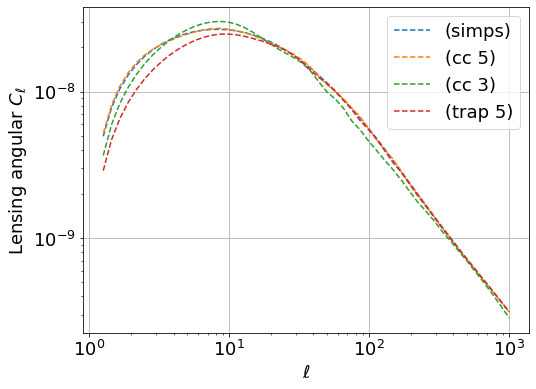

In [152]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 18
mpl.rcParams["font.family"] = "Times New Roman"

figure(figsize=(8, 6))
loglog(ell, jec_cl_jax1[0], '--', label='(simps)')
#loglog(ell, jec_cl_jax2[0], '--', label='(cc 50)')
loglog(ell, jec_cl_jax5[0], '--', label='(cc 5)')
loglog(ell, jec_cl_jax6[0], '--', label='(cc 3)')
loglog(ell, jec_cl_jax7[0], '--', label='(trap 5)')
grid()
legend()
xlabel(r'$\ell$')
ylabel(r'Lensing angular $C_\ell$')

In [35]:
%time   jit(angular_cl)(cosmo_jax, ell, [tracer_jax])
%timeit jit(angular_cl)(cosmo_jax, ell, [tracer_jax])

CPU times: user 2.04 ms, sys: 0 ns, total: 2.04 ms
Wall time: 1.44 ms
224 ms ± 2.69 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [40]:
@jit
def f2():
    return angular_cl(cosmo_jax, ell, [tracer_jax], quadInt=ClenshawCurtisQuad(5))

In [41]:
%time   f2()
%timeit f2()

CPU times: user 12.1 s, sys: 127 ms, total: 12.2 s
Wall time: 12.2 s
4.9 ms ± 105 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [44]:
@jit
def f3():
    return angular_cl(cosmo_jax, ell, [tracer_jax], quadInt=ClenshawCurtisQuad(50))

In [45]:
%time   f3()
%timeit f3()

CPU times: user 12.6 s, sys: 15.3 ms, total: 12.6 s
Wall time: 12.7 s
31.1 ms ± 480 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
